In [6]:
import pandas as pd

datos = pd.read_excel("default of credit card clients.xls", header = 1)

datos.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
datos.drop("ID", axis=1, inplace = True)

In [24]:
datos.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month'],
      dtype='object')

In [16]:
datos.drop("SEX", axis=1, inplace=True)
datos.drop("MARRIAGE", axis=1, inplace=True)
datos.drop("EDUCATION", axis=1, inplace=True)

In [ ]:
malos = datos[datos["default payment next month"] == 1]
pagadores = datos[datos["default payment next month"] == 0]

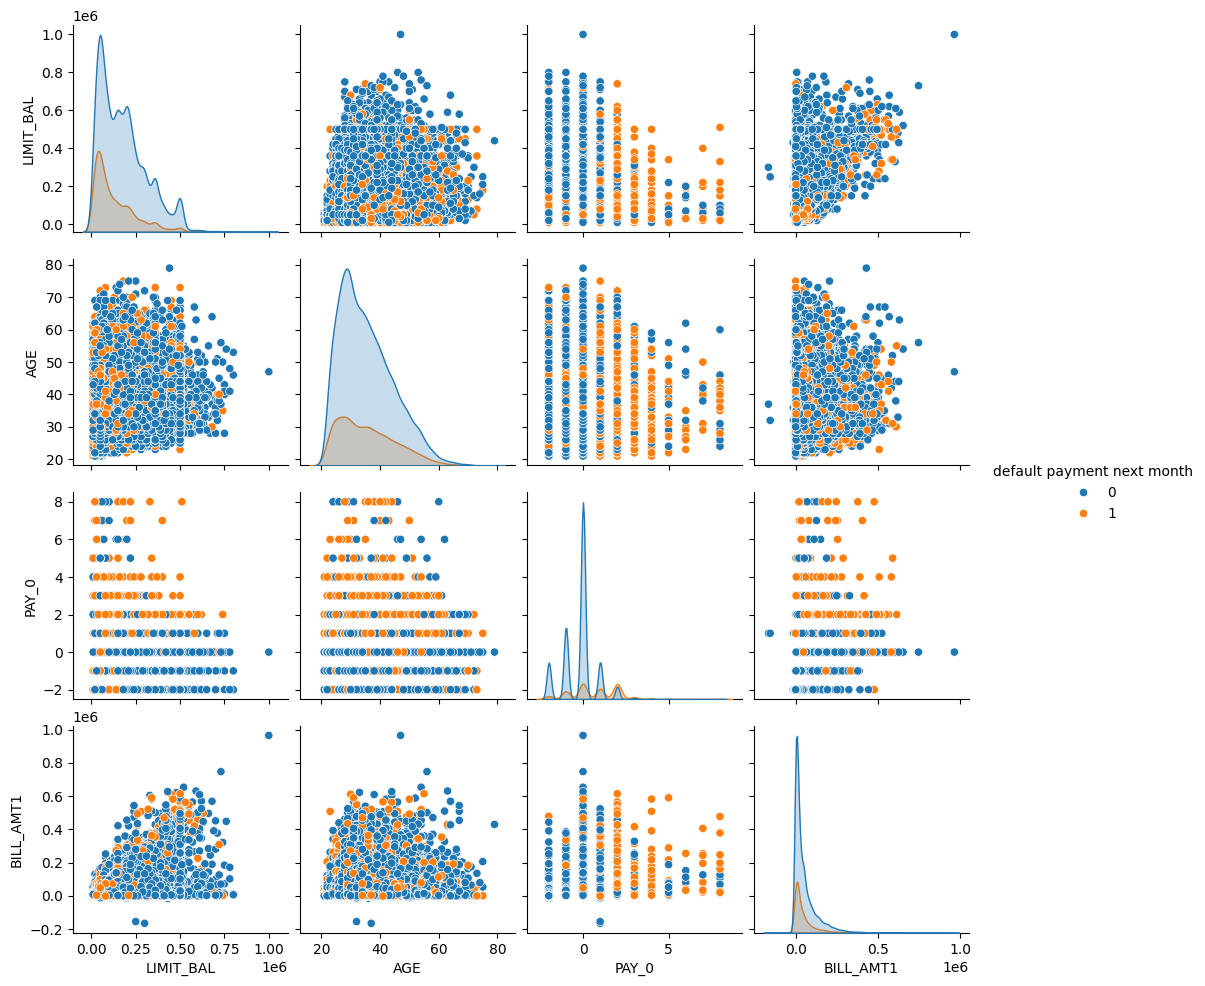

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns


numericals = ["LIMIT_BAL", "AGE", "PAY_0","BILL_AMT1"]

sns.pairplot(datos, vars=numericals, hue="default payment next month")
plt.show()

In [58]:
#VAMOS A CREAR DISTINTOS MODELOS DE ML
import numpy as np
import plotly.express as px

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

escalador = StandardScaler()
X = escalador.fit_transform(datos[['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']])

y = datos["default payment next month"]



X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)


In [59]:
log_re = LogisticRegression()

log_re.fit(X_train, y_train)

prediccion_log_re = log_re.predict(X_test)

score_log_re = accuracy_score(y_test, prediccion_log_re)

report = classification_report(y_test, prediccion_log_re)

cm = confusion_matrix(y_test, prediccion_log_re)


In [71]:
print("El score es:", score_log_re)
print("\n\n\n")
print(report)
print("\n\n\n")
print("martriz confucion:\n", cm)
print("\n\n\n")
print("los coeficientes son:\n", log_re.coef_)
print("\n\n\n")
print("el intercept es:\n", log_re.intercept_)

El score es: 0.8098333333333333




              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.70      0.23      0.34      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000





martriz confucion:
 [[4560  127]
 [1014  299]]




los coeficientes son:
 [[-0.08041467  0.096983    0.64766686  0.10892285  0.07819888  0.05271587
   0.01863168  0.01898481 -0.37646086  0.14233154  0.09903163 -0.05692059
   0.05055349  0.019644   -0.16997075 -0.23334152 -0.02620002 -0.0552908
  -0.02192053 -0.04981589]]




el intercept es:
 [-1.45592946]


In [72]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
prediccion_rfc = rfc.predict(X_test)
score_rfc = accuracy_score(y_test, prediccion_rfc)

report_rfc = classification_report(y_test, prediccion_rfc)

cm_rfc = confusion_matrix(y_test, prediccion_rfc)

print("El score es:", score_rfc)
print("\n\n\n")
print(report_rfc)
print("\n\n\n")
print("matriz confución:\n", cm_rfc)

El score es: 0.8151666666666667




              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.63      0.37      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.74      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000





matriz confución:
 [[4402  285]
 [ 824  489]]


In [74]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
prediccion_xgb = xgb.predict(X_test)
score_xgb = accuracy_score(y_test, prediccion_xgb)
report_xgb = classification_report(y_test, prediccion_xgb)
m_xgb = confusion_matrix(y_test, prediccion_xgb)

print("score:", score_xgb)
print("\n\n")
print(report_xgb)
print("\n\n")
print("matriz conf:\n", m_xgb)

score: 0.816



              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.64      0.37      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.74      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000




matriz conf:
 [[4412  275]
 [ 829  484]]
